## Scraping Data from Wikipedria

In [1]:
import requests 
from bs4 import BeautifulSoup as bs

### Store Columns and Rows

In [2]:
r = requests.get("https://en.wikipedia.org/wiki/Mr._Olympia")
soup = bs(r.content) # I change de 'webpage' to 'soup' as a convention
table = soup.find_all("table", {"class": "wikitable"})[0]   

In [3]:
columns_name = table.find_all('th')
columns_name = [th.text.strip() for th in columns_name]

columns_name

['#', 'Year', 'Winner(s)[a]', 'Award', 'Venue']

In [4]:
rows = table.tbody.find_all('tr')
rows = rows[1:]

l = []
for tr in rows:
    td = tr.find_all('td')
    row = [str(tr.get_text()).strip() for tr in td]
    l.append(row)
    
for row in l:
    print(row)

['1', '1965', 'Larry Scott[31]', '$1,000', 'New York, United States']
['2', '1966']
['3', '1967', 'Sergio Oliva[32]']
['4', '1968']
['5', '1969']
['6', '1970', 'Arnold Schwarzenegger[32]']
['7', '1971', 'Paris, France']
['8', '1972', 'Essen, West Germany']
['9', '1973', 'New York, United States']
['10', '1974', 'Arnold Schwarzenegger[32](Heavyweight & overall)', 'Franco Columbu(Lightweight)']
['11', '1975', '$2,500', 'Pretoria, South Africa']
['12', '1976', 'Franco Columbu[32](Lightweight & overall)', 'Ken Waller(Heavyweight)', '$5,000', 'Columbus, United States']
['13', '1977', 'Frank Zane[32](Lightweight & overall)', 'Robby Robinson(Heavyweight)']
['14', '1978', '$15,000']
['15', '1979', 'Mike Mentzer(Heavyweight)', '$25,000']
['16', '1980', 'Arnold Schwarzenegger[32]', 'Sydney, Australia']
['17', '1981', 'Franco Columbu[32]', 'Columbus, United States']
['18', '1982', 'Chris Dickerson[32]', 'London, United Kingdom']
['19', '1983', 'Samir Bannout[32]', 'Munich, West Germany']
['20', '

### Get all the index on the table

In [5]:
index_row = [row[0] for row in l]
index_row

['1',
 '2',
 '3',
 '4',
 '5',
 '6',
 '7',
 '8',
 '9',
 '10',
 '11',
 '12',
 '13',
 '14',
 '15',
 '16',
 '17',
 '18',
 '19',
 '20',
 '21',
 '22',
 '23',
 '24',
 '25',
 '26',
 '27',
 '28',
 '29',
 '30',
 '31',
 '32',
 '33',
 '34',
 '35',
 '36',
 '37',
 '38',
 '39',
 '40',
 '41',
 '42',
 '43',
 '44',
 '45',
 '46',
 '47',
 '48',
 '49',
 '50',
 '51',
 '52',
 '53',
 '54',
 '55',
 '56',
 '57',
 '58',
 '59']

### Get all the 'Year' on the table

In [6]:
year_row =  [row[1] for row in l]
year_row

['1965',
 '1966',
 '1967',
 '1968',
 '1969',
 '1970',
 '1971',
 '1972',
 '1973',
 '1974',
 '1975',
 '1976',
 '1977',
 '1978',
 '1979',
 '1980',
 '1981',
 '1982',
 '1983',
 '1984',
 '1985',
 '1986',
 '1987',
 '1988',
 '1989',
 '1990',
 '1991',
 '1992',
 '1993',
 '1994',
 '1995',
 '1996',
 '1997',
 '1998',
 '1999',
 '2000',
 '2001',
 '2002',
 '2003',
 '2004',
 '2005',
 '2006',
 '2007',
 '2008',
 '2009',
 '2010',
 '2011',
 '2012',
 '2013',
 '2014',
 '2015',
 '2016',
 '2017',
 '2018',
 '2019',
 '2020',
 '2021',
 '2022',
 '2023']

### Get all the 'Winner(s)' on the table

In [7]:
winner_row = []

for row in l:
    if len(row) >= 3:
        winner_row.append('n/a' if '$' in row[2] else row[2])
    else:
        winner_row.append('n/a')

winner_row

#I see some outputs with countries on their names, we need to fix that!

['Larry Scott[31]',
 'n/a',
 'Sergio Oliva[32]',
 'n/a',
 'n/a',
 'Arnold Schwarzenegger[32]',
 'Paris, France',
 'Essen, West Germany',
 'New York, United States',
 'Arnold Schwarzenegger[32](Heavyweight & overall)',
 'n/a',
 'Franco Columbu[32](Lightweight & overall)',
 'Frank Zane[32](Lightweight & overall)',
 'n/a',
 'Mike Mentzer(Heavyweight)',
 'Arnold Schwarzenegger[32]',
 'Franco Columbu[32]',
 'Chris Dickerson[32]',
 'Samir Bannout[32]',
 'Lee Haney[32]',
 'Brussels, Belgium',
 'n/a',
 'Gothenburg, Sweden',
 'Unknown',
 'Rimini, Italy',
 'n/a',
 'Orlando, United States',
 'Dorian Yates[32]',
 'Atlanta, United States',
 'n/a',
 'n/a',
 'Chicago, United States',
 'Los Angeles, United States',
 'Ronnie Coleman[32]',
 'Las Vegas, United States',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'Jay Cutler[32]',
 'n/a',
 'Dexter Jackson[32]',
 'Jay Cutler[32]',
 'n/a',
 'Phil Heath[32]',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'Shawn Rhoden[33]',
 'Brandon Curry[34]',
 'Ma

In [8]:
# List of known countries
known_countries = [
    'Afghanistan', 'Albania', 'Algeria', 'Andorra', 'Angola', 'Antigua and Barbuda', 'Argentina', 'Armenia', 'Australia', 'Austria',
    'Azerbaijan', 'Bahamas', 'Bahrain', 'Bangladesh', 'Barbados', 'Belarus', 'Belgium', 'Belize', 'Benin', 'Bhutan', 'Bolivia',
    'Bosnia and Herzegovina', 'Botswana', 'Brazil', 'Brunei', 'Bulgaria', 'Burkina Faso', 'Burundi', 'Côte d\'Ivoire', 'Cabo Verde',
    'Cambodia', 'Cameroon', 'Canada', 'Central African Republic', 'Chad', 'Chile', 'China', 'Colombia', 'Comoros', 'Congo (Congo-Brazzaville)',
    'Costa Rica', 'Croatia', 'Cuba', 'Cyprus', 'Czechia (Czech Republic)', 'Democratic Republic of the Congo', 'Denmark', 'Djibouti',
    'Dominica', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador', 'Equatorial Guinea', 'Eritrea', 'Estonia', 'Eswatini (fmr. "Swaziland")',
    'Ethiopia', 'Fiji', 'Finland', 'France', 'Gabon', 'Gambia', 'Georgia', 'Germany', 'Ghana', 'Greece', 'Grenada', 'Guatemala', 'Guinea',
    'Guinea-Bissau', 'Guyana', 'Haiti', 'Holy See', 'Honduras', 'Hungary', 'Iceland', 'India', 'Indonesia', 'Iran', 'Iraq', 'Ireland',
    'Israel', 'Italy', 'Jamaica', 'Japan', 'Jordan', 'Kazakhstan', 'Kenya', 'Kiribati', 'Kuwait', 'Kyrgyzstan', 'Laos', 'Latvia', 'Lebanon',
    'Lesotho', 'Liberia', 'Libya', 'Liechtenstein', 'Lithuania', 'Luxembourg', 'Madagascar', 'Malawi', 'Malaysia', 'Maldives', 'Mali', 'Malta',
    'Marshall Islands', 'Mauritania', 'Mauritius', 'Mexico', 'Micronesia', 'Moldova', 'Monaco', 'Mongolia', 'Montenegro', 'Morocco', 'Mozambique',
    'Myanmar (formerly Burma)', 'Namibia', 'Nauru', 'Nepal', 'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Nigeria', 'North Korea',
    'North Macedonia (formerly Macedonia)', 'Norway', 'Oman', 'Pakistan', 'Palau', 'Palestine State', 'Panama', 'Papua New Guinea', 'Paraguay',
    'Peru', 'Philippines', 'Poland', 'Portugal', 'Qatar', 'Romania', 'Russia', 'Rwanda', 'Saint Kitts and Nevis', 'Saint Lucia',
    'Saint Vincent and the Grenadines', 'Samoa', 'San Marino', 'Sao Tome and Principe', 'Saudi Arabia', 'Senegal', 'Serbia', 'Seychelles',
    'Sierra Leone', 'Singapore', 'Slovakia', 'Slovenia', 'Solomon Islands', 'Somalia', 'South Africa', 'South Korea', 'South Sudan', 'Spain',
    'Sri Lanka', 'Sudan', 'Suriname', 'Sweden', 'Switzerland', 'Syria', 'Tajikistan', 'Tanzania', 'Thailand', 'Timor-Leste', 'Togo', 'Tonga',
    'Trinidad and Tobago', 'Tunisia', 'Turkey', 'Turkmenistan', 'Tuvalu', 'Uganda', 'Ukraine', 'United Arab Emirates', 'United Kingdom',
    'United States of America', 'United States', 'Unknown', 'Uruguay', 'Uzbekistan', 'Vanuatu', 'Venezuela', 'Vietnam', 'Yemen', 'Zambia', 'Zimbabwe'
]

In [9]:
for i, error_country in enumerate(winner_row):
    for country in known_countries:
        if country in error_country:
            winner_row[i] = 'n/a'
            break

winner_row

['Larry Scott[31]',
 'n/a',
 'Sergio Oliva[32]',
 'n/a',
 'n/a',
 'Arnold Schwarzenegger[32]',
 'n/a',
 'n/a',
 'n/a',
 'Arnold Schwarzenegger[32](Heavyweight & overall)',
 'n/a',
 'Franco Columbu[32](Lightweight & overall)',
 'Frank Zane[32](Lightweight & overall)',
 'n/a',
 'Mike Mentzer(Heavyweight)',
 'Arnold Schwarzenegger[32]',
 'Franco Columbu[32]',
 'Chris Dickerson[32]',
 'Samir Bannout[32]',
 'Lee Haney[32]',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'Dorian Yates[32]',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'Ronnie Coleman[32]',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'Jay Cutler[32]',
 'n/a',
 'Dexter Jackson[32]',
 'Jay Cutler[32]',
 'n/a',
 'Phil Heath[32]',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'n/a',
 'Shawn Rhoden[33]',
 'Brandon Curry[34]',
 'Mamdouh Elssbiay[35]',
 'n/a',
 'Hadi Choopan',
 'Derek Lunsford']

In [10]:
len(winner_row) #Checking the number of winners

59

#### Fixing the 'n/a' on the 'Winner(s)' table

In [11]:
winner_row = [f"{index}, {winner}" for index, winner in enumerate(winner_row, start=1)]
winner_row

['1, Larry Scott[31]',
 '2, n/a',
 '3, Sergio Oliva[32]',
 '4, n/a',
 '5, n/a',
 '6, Arnold Schwarzenegger[32]',
 '7, n/a',
 '8, n/a',
 '9, n/a',
 '10, Arnold Schwarzenegger[32](Heavyweight & overall)',
 '11, n/a',
 '12, Franco Columbu[32](Lightweight & overall)',
 '13, Frank Zane[32](Lightweight & overall)',
 '14, n/a',
 '15, Mike Mentzer(Heavyweight)',
 '16, Arnold Schwarzenegger[32]',
 '17, Franco Columbu[32]',
 '18, Chris Dickerson[32]',
 '19, Samir Bannout[32]',
 '20, Lee Haney[32]',
 '21, n/a',
 '22, n/a',
 '23, n/a',
 '24, n/a',
 '25, n/a',
 '26, n/a',
 '27, n/a',
 '28, Dorian Yates[32]',
 '29, n/a',
 '30, n/a',
 '31, n/a',
 '32, n/a',
 '33, n/a',
 '34, Ronnie Coleman[32]',
 '35, n/a',
 '36, n/a',
 '37, n/a',
 '38, n/a',
 '39, n/a',
 '40, n/a',
 '41, n/a',
 '42, Jay Cutler[32]',
 '43, n/a',
 '44, Dexter Jackson[32]',
 '45, Jay Cutler[32]',
 '46, n/a',
 '47, Phil Heath[32]',
 '48, n/a',
 '49, n/a',
 '50, n/a',
 '51, n/a',
 '52, n/a',
 '53, n/a',
 '54, Shawn Rhoden[33]',
 '55, Bra

In [12]:
previous_name = None
winner_list = []

for item in winner_row:
    parts = item.split(', ')  
    if len(parts) == 2:
        index, name = parts
        if name != 'n/a':
            previous_name = name
    if previous_name is not None:
        winner_list.append(previous_name) 

len(winner_list)

59

In [13]:
winner_list

['Larry Scott[31]',
 'Larry Scott[31]',
 'Sergio Oliva[32]',
 'Sergio Oliva[32]',
 'Sergio Oliva[32]',
 'Arnold Schwarzenegger[32]',
 'Arnold Schwarzenegger[32]',
 'Arnold Schwarzenegger[32]',
 'Arnold Schwarzenegger[32]',
 'Arnold Schwarzenegger[32](Heavyweight & overall)',
 'Arnold Schwarzenegger[32](Heavyweight & overall)',
 'Franco Columbu[32](Lightweight & overall)',
 'Frank Zane[32](Lightweight & overall)',
 'Frank Zane[32](Lightweight & overall)',
 'Mike Mentzer(Heavyweight)',
 'Arnold Schwarzenegger[32]',
 'Franco Columbu[32]',
 'Chris Dickerson[32]',
 'Samir Bannout[32]',
 'Lee Haney[32]',
 'Lee Haney[32]',
 'Lee Haney[32]',
 'Lee Haney[32]',
 'Lee Haney[32]',
 'Lee Haney[32]',
 'Lee Haney[32]',
 'Lee Haney[32]',
 'Dorian Yates[32]',
 'Dorian Yates[32]',
 'Dorian Yates[32]',
 'Dorian Yates[32]',
 'Dorian Yates[32]',
 'Dorian Yates[32]',
 'Ronnie Coleman[32]',
 'Ronnie Coleman[32]',
 'Ronnie Coleman[32]',
 'Ronnie Coleman[32]',
 'Ronnie Coleman[32]',
 'Ronnie Coleman[32]',
 'Ro

In [14]:
def limpar_nome(nome):
    # Dividir a string no primeiro encontro de "[" ou "("
    for caractere in ["[", "("]:
        nome = nome.split(caractere)[0]
    # Retornar a parte limpa do nome com os espaços em branco removidos
    return nome.strip()

# Aplicar a função de limpeza em cada nome da lista
winner_list = [limpar_nome(nome) for nome in winner_list]
winner_list


['Larry Scott',
 'Larry Scott',
 'Sergio Oliva',
 'Sergio Oliva',
 'Sergio Oliva',
 'Arnold Schwarzenegger',
 'Arnold Schwarzenegger',
 'Arnold Schwarzenegger',
 'Arnold Schwarzenegger',
 'Arnold Schwarzenegger',
 'Arnold Schwarzenegger',
 'Franco Columbu',
 'Frank Zane',
 'Frank Zane',
 'Mike Mentzer',
 'Arnold Schwarzenegger',
 'Franco Columbu',
 'Chris Dickerson',
 'Samir Bannout',
 'Lee Haney',
 'Lee Haney',
 'Lee Haney',
 'Lee Haney',
 'Lee Haney',
 'Lee Haney',
 'Lee Haney',
 'Lee Haney',
 'Dorian Yates',
 'Dorian Yates',
 'Dorian Yates',
 'Dorian Yates',
 'Dorian Yates',
 'Dorian Yates',
 'Ronnie Coleman',
 'Ronnie Coleman',
 'Ronnie Coleman',
 'Ronnie Coleman',
 'Ronnie Coleman',
 'Ronnie Coleman',
 'Ronnie Coleman',
 'Ronnie Coleman',
 'Jay Cutler',
 'Jay Cutler',
 'Dexter Jackson',
 'Jay Cutler',
 'Jay Cutler',
 'Phil Heath',
 'Phil Heath',
 'Phil Heath',
 'Phil Heath',
 'Phil Heath',
 'Phil Heath',
 'Phil Heath',
 'Shawn Rhoden',
 'Brandon Curry',
 'Mamdouh Elssbiay',
 'Mamd

### Getting the 'Award'

In [15]:
award_list = []
for row in l:
    found = False
    for index, item in enumerate(row):
        if '$' in item:
            award_list.append([row[0], item])
            found = True
            break 
    if not found:
        award_list.append([row[0],'n/a'])

award_list

[['1', '$1,000'],
 ['2', 'n/a'],
 ['3', 'n/a'],
 ['4', 'n/a'],
 ['5', 'n/a'],
 ['6', 'n/a'],
 ['7', 'n/a'],
 ['8', 'n/a'],
 ['9', 'n/a'],
 ['10', 'n/a'],
 ['11', '$2,500'],
 ['12', '$5,000'],
 ['13', 'n/a'],
 ['14', '$15,000'],
 ['15', '$25,000'],
 ['16', 'n/a'],
 ['17', 'n/a'],
 ['18', 'n/a'],
 ['19', 'n/a'],
 ['20', '$50,000'],
 ['21', 'n/a'],
 ['22', '$55,000'],
 ['23', 'n/a'],
 ['24', 'n/a'],
 ['25', 'n/a'],
 ['26', '$100,000'],
 ['27', 'n/a'],
 ['28', 'n/a'],
 ['29', 'n/a'],
 ['30', 'n/a'],
 ['31', '$110,000'],
 ['32', 'n/a'],
 ['33', 'n/a'],
 ['34', 'n/a'],
 ['35', 'n/a'],
 ['36', 'n/a'],
 ['37', 'n/a'],
 ['38', 'n/a'],
 ['39', 'n/a'],
 ['40', '$120,000'],
 ['41', '$150,000'],
 ['42', '$155,000'],
 ['43', 'n/a'],
 ['44', 'n/a'],
 ['45', '$200,000'],
 ['46', 'n/a'],
 ['47', 'n/a'],
 ['48', '$250,000'],
 ['49', 'n/a'],
 ['50', '$275,000'],
 ['51', '$400,000'],
 ['52', 'n/a'],
 ['53', 'n/a'],
 ['54', 'n/a'],
 ['55', 'n/a'],
 ['56', 'n/a'],
 ['57', 'n/a'],
 ['58', 'n/a'],
 ['59', 'n/

#### Cleaning the 'n/a'

In [16]:
award_list_complete = []
        
for item in award_list:
    award_list_complete.append(item[1])

for index, item in enumerate(award_list_complete):
    if item == 'n/a':
        award_list_complete[index] = award_list_complete[index-1]
        
award_list_complete

['$1,000',
 '$1,000',
 '$1,000',
 '$1,000',
 '$1,000',
 '$1,000',
 '$1,000',
 '$1,000',
 '$1,000',
 '$1,000',
 '$2,500',
 '$5,000',
 '$5,000',
 '$15,000',
 '$25,000',
 '$25,000',
 '$25,000',
 '$25,000',
 '$25,000',
 '$50,000',
 '$50,000',
 '$55,000',
 '$55,000',
 '$55,000',
 '$55,000',
 '$100,000',
 '$100,000',
 '$100,000',
 '$100,000',
 '$100,000',
 '$110,000',
 '$110,000',
 '$110,000',
 '$110,000',
 '$110,000',
 '$110,000',
 '$110,000',
 '$110,000',
 '$110,000',
 '$120,000',
 '$150,000',
 '$155,000',
 '$155,000',
 '$155,000',
 '$200,000',
 '$200,000',
 '$200,000',
 '$250,000',
 '$250,000',
 '$275,000',
 '$400,000',
 '$400,000',
 '$400,000',
 '$400,000',
 '$400,000',
 '$400,000',
 '$400,000',
 '$400,000',
 '$400,000']

In [17]:
awards_int = []

for award in award_list_complete:
    # Remover o símbolo de dólar e a vírgula, depois converter para inteiro
    award_int = int(award.replace("$", "").replace(",", ""))
    awards_int.append(award_int)


### Getting the 'Venue'

In [18]:
venue_list = []

for row in l:
    found = False
    for item in row:
        for country in known_countries:
            if country in item:
                venue_list.append([item.strip()])
                found = True
                break
        if found:
            break
    if not found:
        venue_list.append(['n/a'])

venue_list

[['New York, United States'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['Paris, France'],
 ['Essen, West Germany'],
 ['New York, United States'],
 ['n/a'],
 ['Pretoria, South Africa'],
 ['Columbus, United States'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['Sydney, Australia'],
 ['Columbus, United States'],
 ['London, United Kingdom'],
 ['Munich, West Germany'],
 ['New York, United States'],
 ['Brussels, Belgium'],
 ['Columbus, United States'],
 ['Gothenburg, Sweden'],
 ['Unknown'],
 ['Rimini, Italy'],
 ['Chicago, United States'],
 ['Orlando, United States'],
 ['Helsinki, Finland'],
 ['Atlanta, United States'],
 ['n/a'],
 ['n/a'],
 ['Chicago, United States'],
 ['Los Angeles, United States'],
 ['New York, United States'],
 ['Las Vegas, United States'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['n/a'],
 ['Orlando, United States'],
 ['n/a'],

##### Cleaning the 'n/a' on 'Venue'

In [19]:
previous_name = None

for venue in venue_list:
    if venue[0] != 'n/a':
        previous_name = venue[0]
        break

for i, venue in enumerate(venue_list):
    if venue[0] == 'n/a':
        venue_list[i][0] = previous_name

len(venue_list)

59

In [20]:
venue_list

[['New York, United States'],
 ['New York, United States'],
 ['New York, United States'],
 ['New York, United States'],
 ['New York, United States'],
 ['New York, United States'],
 ['Paris, France'],
 ['Essen, West Germany'],
 ['New York, United States'],
 ['New York, United States'],
 ['Pretoria, South Africa'],
 ['Columbus, United States'],
 ['New York, United States'],
 ['New York, United States'],
 ['New York, United States'],
 ['Sydney, Australia'],
 ['Columbus, United States'],
 ['London, United Kingdom'],
 ['Munich, West Germany'],
 ['New York, United States'],
 ['Brussels, Belgium'],
 ['Columbus, United States'],
 ['Gothenburg, Sweden'],
 ['Unknown'],
 ['Rimini, Italy'],
 ['Chicago, United States'],
 ['Orlando, United States'],
 ['Helsinki, Finland'],
 ['Atlanta, United States'],
 ['New York, United States'],
 ['New York, United States'],
 ['Chicago, United States'],
 ['Los Angeles, United States'],
 ['New York, United States'],
 ['Las Vegas, United States'],
 ['New York, Unite

In [21]:
cities = []
countries = []

for venue in venue_list:
    if venue[0] == 'Unknown':
        cities.append('Unknown')
        countries.append('Unknown')
    else:
        cities.append(venue[0].split(",")[0])
        countries.append(venue[0].split(",")[1])

In [22]:
olympia = []

for index in range(len(index_row)):
    olympia.append({
        'year': year_row[index],
        'winner': winner_list[index],
        'award': awards_int[index],
        'city': cities[index],
        'country': countries[index]
        #'venue': venue_list[index][0]
    })

## Create DataFrame

In [23]:
import pandas as pd

In [24]:
df_olympia = pd.DataFrame(olympia)

df_olympia.loc[df_olympia['winner'] == 'Franco Columbu', 'winner'] = 'Ken Waller'
df_olympia.loc[df_olympia['winner'] == 'Frank Zane', 'winner'] = 'Robby Robinson'

df_olympia.head(5)

,year,winner,award,city,country
0,1965,Larry Scott,1000,New York,United States
1,1966,Larry Scott,1000,New York,United States
2,1967,Sergio Oliva,1000,New York,United States
3,1968,Sergio Oliva,1000,New York,United States
4,1969,Sergio Oliva,1000,New York,United States


Corrects missing information about City and Country

In [25]:
df_olympia['city'] = df_olympia['city'].replace('Unknown', 'Los Angeles')
df_olympia['country'] = df_olympia['country'].replace('Unknown', 'United States')

df_olympia.head()

,year,winner,award,city,country
0,1965,Larry Scott,1000,New York,United States
1,1966,Larry Scott,1000,New York,United States
2,1967,Sergio Oliva,1000,New York,United States
3,1968,Sergio Oliva,1000,New York,United States
4,1969,Sergio Oliva,1000,New York,United States


Create a DataFrame for Winners

In [26]:
winners_unique = df_olympia['winner'].drop_duplicates()
df_winners = pd.DataFrame(winners_unique, columns=['winner'])

winner_counts = df_olympia['winner'].value_counts()
df_winners['wins'] = df_winners['winner'].map(winner_counts)

df_winners.head()

,winner,wins
0,Larry Scott,2
2,Sergio Oliva,3
5,Arnold Schwarzenegger,7
11,Ken Waller,2
12,Robby Robinson,2


### Get Height, Weight

Function to get Height through Wikipedia 

In [27]:
import re

def getHeight(soup):
    # Encontra a tag <th> que contém o texto "Height"
    height_th = soup.find("th", string=re.compile("Height"))

    # Se encontrar a tag <th>, obtém o próximo elemento irmão <td>
    if height_th:
        height_td = height_th.find_next("td")
        
        # Extrai o texto do elemento <td>
        height_text = height_td.get_text(strip=True)
        
        # Usa expressão regular para extrair apenas o valor em centímetros
        cm_value = re.search(r'(\d+)\s*cm', height_text)
        
        if cm_value:
            # Adiciona o valor em centímetros à lista
            return cm_value.group(1)
        else:
            return None # Adiciona None se a altura não for encontrada
    else:
        return None  # Adiciona None se a altura não for encontrada

In [28]:
def getWeight(soup):
    # Encontra a tag <th> que contém o texto "Height"
    weight_th = soup.find("th", string=re.compile("Weight"))

    # Se encontrar a tag <th>, obtém o próximo elemento irmão <td>
    if weight_th:
        weight_td = weight_th.find_next("td")
        
        # Extrai o texto do elemento <td>
        weight_text = weight_td.get_text(strip=True) 
        
        regex_patterns = [
            r'Contest:\s*\d+\s*lb\s*\((\d+)\s*kg\)',
            r'contest:\s*\d+\s*lb\s*\((\d+)\s*kg\)',
            r'Contest:\s*\d+–\d+\s*lb\s*\((\d+)–\d+\s*kg\)'
        ]
        
        # Usa expressão regular para extrair apenas o valor em centímetros
        for pattern in regex_patterns:
            match = re.search(pattern, weight_text)
            if match:
                return match.group(1)
            
        else:
            return None # Adiciona None se a altura não for encontrada
    else:
        return None  # Adiciona None se a altura não for encontrada

In [29]:
winner_height = []
winner_weight = []

for winner in winners_unique:
    try:
        r = requests.get(f"https://en.wikipedia.org/wiki/{winner}")

        # Verifica se a requisição foi bem-sucedida
        if r.status_code == 200:
            soup = bs(r.content)
            
            if soup.find('a', string=re.compile(r'disambiguation')):
                r = requests.get(f"https://en.wikipedia.org/wiki/{winner}_(bodybuilder)")
                soup = bs(r.content)
                winner_height.append(getHeight(soup))
                winner_weight.append(getWeight(soup))
            else:
                winner_height.append(getHeight(soup))
                winner_weight.append(getWeight(soup))
        else:
            winner_height.append(None)  # Adiciona None se a requisição falhar
    except Exception as e:
        print(f"Ocorreu um erro para {winner}: {e}")
        winner_height.append(None)  # Adiciona None se ocorrer um erro

print(winner_height)
print(winner_weight)

['170', '178', None, None, '170', None, '168', '170', '180', '175', '180', None, '165', '175', '178', '173', '175', '169', '168']
['93', '102', None, None, '91', None, None, '93', None, None, '130', None, '98', '109', '111', '116', '134', '100', '102']


In [30]:
df_winners['height_cm'] = winner_height
df_winners['weight_kg'] = winner_weight
df_winners

,winner,wins,height_cm,weight_kg
0,Larry Scott,2,170,93
2,Sergio Oliva,3,178,102
5,Arnold Schwarzenegger,7,None,None
11,Ken Waller,2,None,None
12,Robby Robinson,2,170,91
14,Mike Mentzer,1,None,None
17,Chris Dickerson,1,168,None
18,Samir Bannout,1,170,93
19,Lee Haney,8,180,None
27,Dorian Yates,6,175,None


Correct some anomalies 

In [31]:
df_winners.loc[df_winners['winner'] == 'Arnold Schwarzenegger', 'height_cm'] = 188
df_winners.loc[df_winners['winner'] == 'Mike Mentzer', 'height_cm'] = 173
df_winners.loc[df_winners['winner'] == 'Jay Cutler', 'height_cm'] = 175

df_winners.loc[df_winners['winner'] == 'Arnold Schwarzenegger', 'weight_kg'] = 107
df_winners.loc[df_winners['winner'] == 'Mike Mentzer', 'weight_kg'] = 102
df_winners.loc[df_winners['winner'] == 'Chris Dickerson', 'weight_kg'] = 88
df_winners.loc[df_winners['winner'] == 'Lee Haney', 'weight_kg'] = 116
df_winners.loc[df_winners['winner'] == 'Dorian Yates', 'weight_kg'] = 118
df_winners.loc[df_winners['winner'] == 'Jay Cutler', 'weight_kg'] = 118

In [32]:
df_olympia.head()

,year,winner,award,city,country
0,1965,Larry Scott,1000,New York,United States
1,1966,Larry Scott,1000,New York,United States
2,1967,Sergio Oliva,1000,New York,United States
3,1968,Sergio Oliva,1000,New York,United States
4,1969,Sergio Oliva,1000,New York,United States


## Get Data of each Olympia 

In [33]:
r = requests.get(f"https://en.wikipedia.org/wiki/2005_Mr._Olympia")
soup = bs(r.content)


table = soup.find("table", {"class": "wikitable"})
rows = table.tbody.find_all("tr")
rows = rows[1:]

places = []
for row in rows:
    place = row.find_all("td")[0].get_text(strip=True)
    places.append(place)

names = []
for row in rows:
    name = row.find_all("td")[2].get_text(strip=True)
    names.append(name)

leaderboard = []
for year in df_olympia['year']:
    if year == '1974':
        l = []
        l.append([None])
        l.append([None])
        leaderboard.append(l)
    else:
        try:
            r = requests.get(f"https://en.wikipedia.org/wiki/{year}_Mr._Olympia")
            if r.status_code == 200:
                soup = bs(r.content)
                
                table = soup.find("table", {"class": "wikitable"})
                rows = table.tbody.find_all("tr")
                rows = rows[1:]
                
                places = []
                for row in rows:
                    place = row.find_all("td")[0].get_text(strip=True)
                    places.append(place)

                names = []
                for row in rows:
                    cells = row.find_all("td")
                    if year == '2000':
                        name = row.find_all("td")[1].get_text(strip=True)
                        names.append(name)
                    else:
                        if (len(cells) >= 3):
                            name = row.find_all("td")[2].get_text(strip=True)
                            name = re.sub(r'\[\d+\]', '', name)
                            names.append(name)
                        elif (len(cells) < 3):
                            name = row.find_all("td")[1].get_text(strip=True)
                            names.append(name)
                l = []
                l.append(places)
                l.append(names)
                leaderboard.append(l)

        except Exception as e:
            print(f"Ocorreu um erro para {year}: {e}")
            winner_height.append(None)  # Adiciona None se ocorrer um erro

Correct some anomalies 

In [34]:
leaderboard[9][0].clear()
leaderboard[9][1].clear()

leaderboard[9][0].append('1')
leaderboard[9][0].append('2')
leaderboard[9][1].append('Arnold Schwarzenegger')
leaderboard[9][1].append('Lou Ferrigno')

In [35]:
leaderboard

[[['1', '2', '3'], ['Larry Scott', 'Harold Poole', 'Earl Maynard']],
 [['1', '', '', ''],
  ['Larry Scott', 'Harold Poole', 'Chuck Sipes', 'Sergio Oliva']],
 [['1', '2', '3', '4'],
  ['Sergio Oliva', 'Chuck Sipes', 'Harold Poole', 'Dave Draper']],
 [['1'], ['Sergio Oliva']],
 [['1', '2'], ['Sergio Oliva', 'Arnold Schwarzenegger']],
 [['1', '2', '3'], ['Arnold Schwarzenegger', 'Sergio Oliva', 'Reg Lewis']],
 [['', 'DQ'], ['Arnold Schwarzenegger', 'Sergio Oliva']],
 [['1', '2', '3', '4', '5', '6'],
  ['Arnold Schwarzenegger',
   'Sergio Oliva',
   'Serge Nubret',
   'Frank Zane',
   'Franco Columbu',
   'Edmund Karolewicz']],
 [['1', '2', '3'],
  ['Arnold Schwarzenegger', 'Franco Columbu', 'Serge Nubret']],
 [['1', '2'], ['Arnold Schwarzenegger', 'Lou Ferrigno']],
 [['1', '2', '3'],
  ['Arnold Schwarzenegger[4]', 'Serge Nubret', 'Lou Ferrigno']],
 [['1', '2'], ['Ken Waller[1]', 'Mike Katz']],
 [['1', '2', '3', '4'],
  ['Robby Robinson[1]', 'Ken Waller', 'Dennis Tinerino', 'Roger Walker']

In [36]:
dfs = []

for year, data in zip(df_olympia['year'], leaderboard):
    places, names = data
    
    # Cria um DataFrame temporário para o ano atual
    df_temp = pd.DataFrame({
        'year': [year] * len(places),
        'place': places,
        'name': names
    })
    
    # Adiciona o DataFrame temporário à lista
    dfs.append(df_temp)

dfs
df_leaderboard = pd.concat(dfs, ignore_index=True)

In [37]:
df_leaderboard

,year,place,name
0,1965,1,Larry Scott
1,1965,2,Harold Poole
2,1965,3,Earl Maynard
3,1966,1,Larry Scott
4,1966,,Harold Poole
...,...,...,...
865,2023,13,Theo Leguerrier
866,2023,14,Roman Fritz
867,2023,15,Justin Shier
868,2023,16,Phil Clahar


## Cool Graphs and data about Olympia

In [42]:
import matplotlib.pyplot as plt

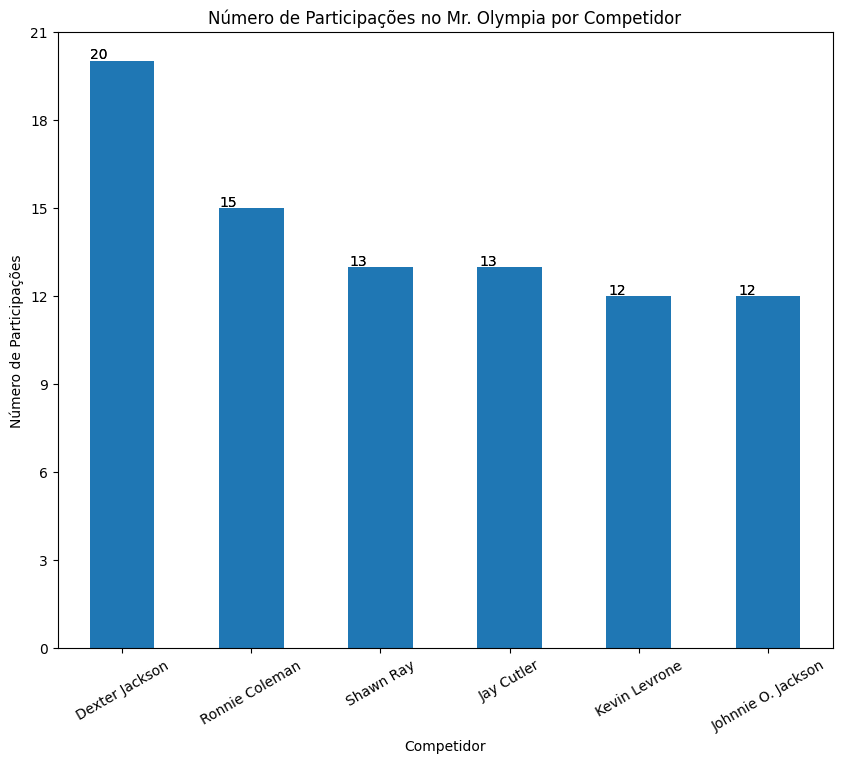

In [129]:
from matplotlib.ticker import MaxNLocator

participations_count = df_leaderboard['name'].value_counts()

plt.figure(figsize=(10, 8))
ax = participations_count.head(6).plot(kind='bar', color='skyblue')

# Criar o gráfico de barras
participations_count.head(6).plot(kind='bar')

# Adicionar título e rótulos aos eixos
plt.title('Número de Participações no Mr. Olympia por Competidor')
plt.xlabel('Competidor')
plt.ylabel('Número de Participações')

# Rotacionar os rótulos do eixo x para melhor visualização
plt.xticks(rotation=30)

plt.gca().yaxis.set_major_locator(MaxNLocator(integer=True))

for p in ax.patches:
    ax.annotate(str(int(p.get_height())), (p.get_x() * 1.005, p.get_height() * 1.005))

# Mostrar o gráfico
plt.show()

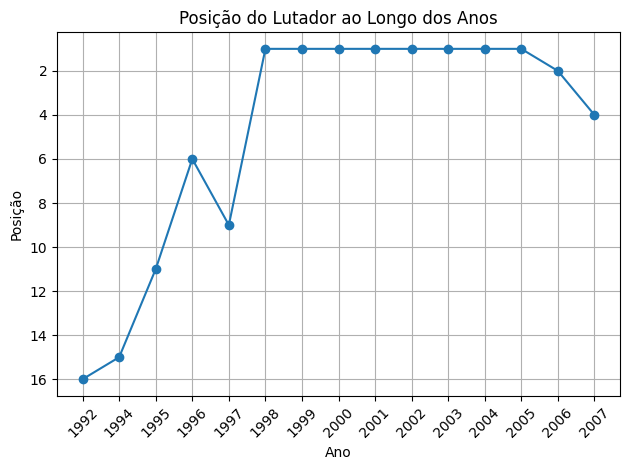

In [182]:
ronnie_positions = df_leaderboard[df_leaderboard['name'].str.contains('Ronnie Coleman', case=False, na=False)].copy()
ronnie_positions['place'] = pd.to_numeric(ronnie_positions['place'], errors='coerce')

# Posição do lutador (pontuação, ranking, etc.)
# Criar o gráfico de linha
plt.plot(ronnie_positions['year'], ronnie_positions['place'], marker='o', linestyle='-')

# Adicionar rótulos e título
plt.xlabel('Ano')
plt.ylabel('Posição')
plt.title('Posição do Lutador ao Longo dos Anos')

# Mostrar o gráfico
plt.grid(True)
plt.xticks(ronnie_positions['year'], rotation=45)  # Rotaciona os rótulos do eixo x para facilitar a leitura
plt.tight_layout()  # Ajusta o layout para garantir que todos os elementos sejam visíveis

plt.gca().invert_yaxis()

plt.show()


# plt.figure(figsize=(10, 8))
# ronnie_positions.plot(kind='line')